In [1]:
!pip install pandas matplotlib seaborn scikit-learn

**Exploratory Data Analysis (EDA) and Business Insights**

In [29]:
# Import Required Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from sklearn.neighbors import NearestNeighbors

In [27]:
# Load the Data

customers = pd.read_csv('/kaggle/input/ecommerce-transactions-dataset/Customers.csv')
products = pd.read_csv('/kaggle/input/ecommerce-transactions-dataset/Products.csv')
transactions = pd.read_csv('/kaggle/input/ecommerce-transactions-dataset/Transactions.csv')


In [30]:
#Data Inspection
# Inspect the first few rows of each dataset
print(customers.head())
print(products.head())
print(transactions.head())

# Check for missing values
print(customers.isnull().sum())
print(products.isnull().sum())
print(transactions.isnull().sum())

# Data types of the columns
print(customers.dtypes)
print(products.dtypes)
print(transactions.dtypes)


  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3       

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


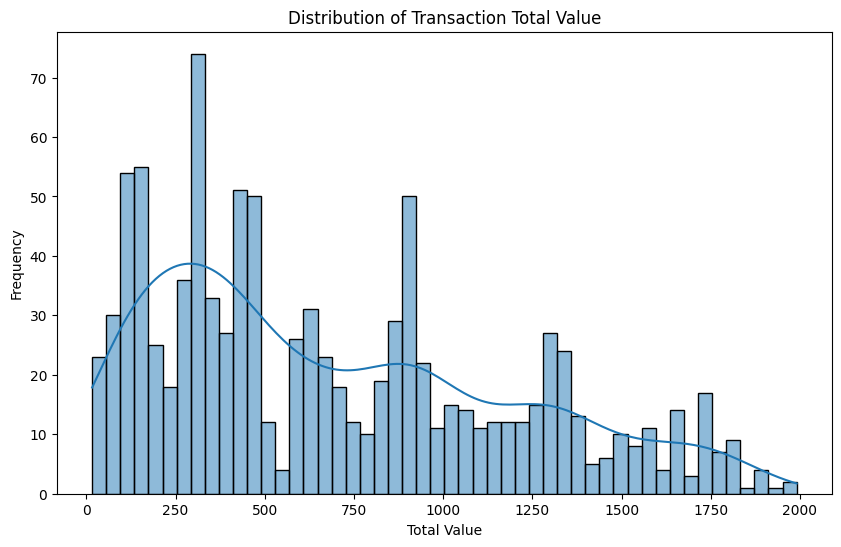

In [74]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Replace infinity values with NaN
transactions['TotalValue'] = transactions['TotalValue'].replace([np.inf, -np.inf], np.nan)

# Drop rows with NaN values (if any)
transactions = transactions.dropna(subset=['TotalValue'])

# Plot the histogram
plt.figure(figsize=(10, 6))
sns.histplot(transactions['TotalValue'], bins=50, kde=True)
plt.title('Distribution of Transaction Total Value')
plt.xlabel('Total Value')
plt.ylabel('Frequency')
plt.show()


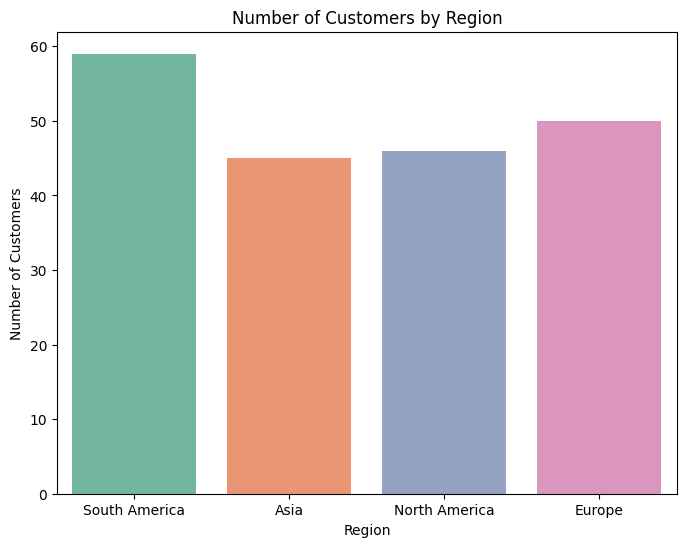

In [32]:
#Customer Region Distribution

plt.figure(figsize=(8, 6))
sns.countplot(data=customers, x='Region', palette='Set2')
plt.title('Number of Customers by Region')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.show()



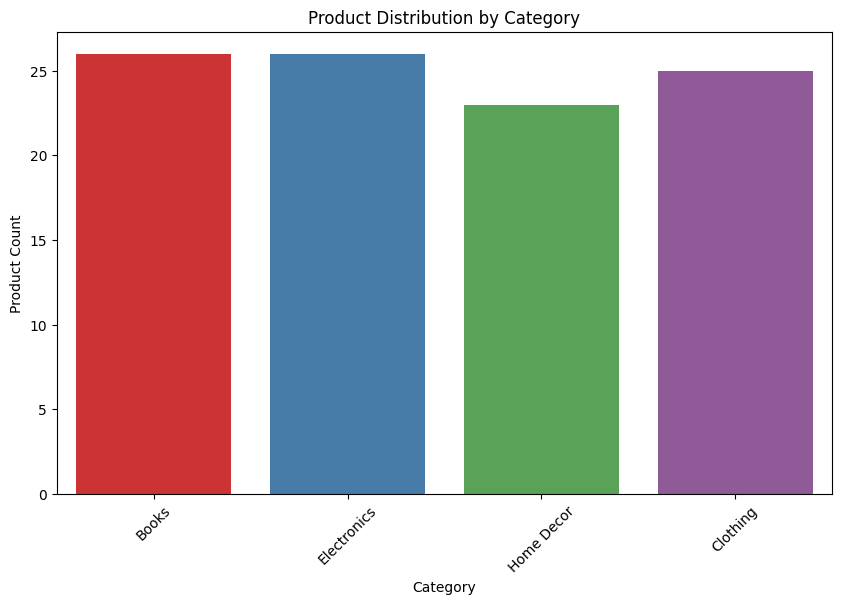

In [33]:
#Product Category Distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=products, x='Category', palette='Set1')
plt.title('Product Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Product Count')
plt.xticks(rotation=45)
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


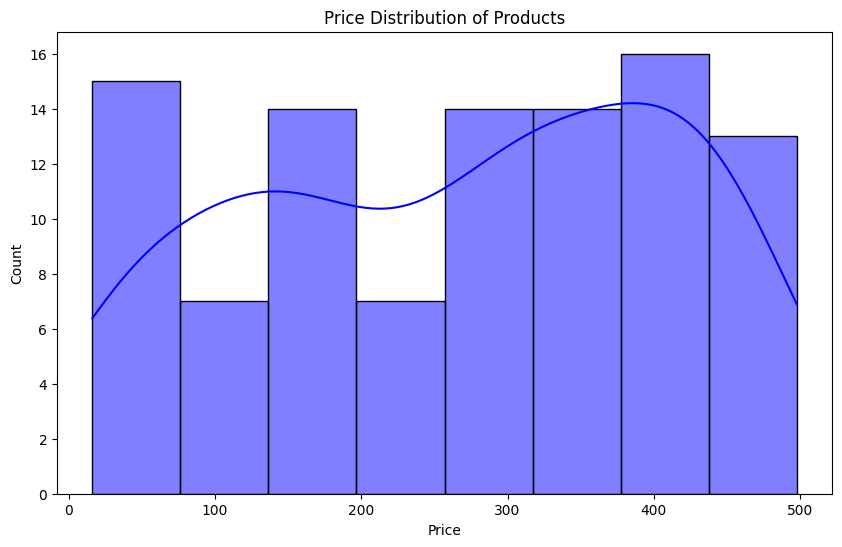

In [36]:
# Product price distribution
plt.figure(figsize=(10, 6))
sns.histplot(products['Price'], kde=True, color='blue')
plt.title('Price Distribution of Products')
plt.show()